In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_submission_data = pd.read_csv('gender_submission.csv')
gender_submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

C:\Users\axe\AppData\Local\Temp\ipykernel_8760\1359732817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
C:\Users\axe\AppData\Local\Temp\ipykernel_8760\1359732817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [8]:
test.drop('Cabin', axis=1, inplace=True)


In [9]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train.drop('Cabin', axis=1, inplace=True)


C:\Users\axe\AppData\Local\Temp\ipykernel_8760\4123438746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [10]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [11]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}


In [12]:
best_model_name = None
best_accuracy = 0

In [13]:
# Encode categorical variables separately for training and test datasets
le_train = LabelEncoder()
le_test = LabelEncoder()

In [14]:
train['Sex'] = le_train.fit_transform(train['Sex'])
train['Embarked'] = le_train.fit_transform(train['Embarked'].astype(str))


In [15]:
test['Sex'] = le_test.fit_transform(test['Sex'])
test['Embarked'] = le_test.fit_transform(test['Embarked'].astype(str))



In [16]:
# Handle missing values in 'Age'
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)


C:\Users\axe\AppData\Local\Temp\ipykernel_8760\2713812312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\axe\AppData\Local\Temp\ipykernel_8760\2713812312.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [17]:
# Evaluate all models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, train[features], train['Survived'], cv=5, scoring='accuracy')
    accuracy_mean = scores.mean()

    print(f'{name} - Accuracy: {accuracy_mean} (std: {scores.std()})')

    # Check if the current model has better accuracy
    if accuracy_mean > best_accuracy:
        best_accuracy = accuracy_mean
        best_model_name = name


Logistic Regression - Accuracy: 0.7890025735986442 (std: 0.016866329037284758)


C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

Random Forest - Accuracy: 0.810369719414977 (std: 0.033665108388363965)
Support Vector Machine - Accuracy: 0.674615529470843 (std: 0.04233274996749585)
K-Nearest Neighbors - Accuracy: 0.697012114744837 (std: 0.028126039235783103)
Gradient Boosting - Accuracy: 0.821568012051974 (std: 0.019064603085191232)


C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this war

AdaBoost - Accuracy: 0.8114995919904588 (std: 0.028123815928766272)
XGBoost - Accuracy: 0.8148389931579938 (std: 0.028467190744306117)


In [18]:
# Train the best model on the entire training dataset
best_model = models[best_model_name]
best_model.fit(train[features], train['Survived'])


GradientBoostingClassifier()

In [19]:
# Encode categorical variables separately for training and test datasets
le_train_sex = LabelEncoder()
le_train_embarked = LabelEncoder()

In [20]:
# Fit and transform on training data
train['Sex'] = le_train_sex.fit_transform(train['Sex'])
train['Embarked'] = le_train_embarked.fit_transform(train['Embarked'].astype(str))


In [21]:
# Only transform on test data (do not fit again)
test['Sex'] = le_train_sex.transform(test['Sex'])
test['Embarked'] = le_train_embarked.transform(test['Embarked'].astype(str))


In [22]:
# Handle missing values in 'Age'
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

C:\Users\axe\AppData\Local\Temp\ipykernel_8760\3952032409.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\axe\AppData\Local\Temp\ipykernel_8760\3952032409.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [23]:
for name, model in models.items():
    scores = cross_val_score(model, train[features], train['Survived'], cv=5, scoring='accuracy')
    accuracy_mean = scores.mean()

    print(f'{name} - Accuracy: {accuracy_mean} (std: {scores.std()})')

    # Check if the current model has better accuracy
    if accuracy_mean > best_accuracy:
        best_accuracy = accuracy_mean
        best_model_name = name


Logistic Regression - Accuracy: 0.7890025735986442 (std: 0.016866329037284758)

C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m


Random Forest - Accuracy: 0.810369719414977 (std: 0.033665108388363965)
Support Vector Machine - Accuracy: 0.674615529470843 (std: 0.04233274996749585)
K-Nearest Neighbors - Accuracy: 0.697012114744837 (std: 0.028126039235783103)
Gradient Boosting - Accuracy: 0.821568012051974 (std: 0.019064603085191232)


C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this war

AdaBoost - Accuracy: 0.8114995919904588 (std: 0.028123815928766272)
XGBoost - Accuracy: 0.8148389931579938 (std: 0.028467190744306117)


In [24]:
# Train the best model on the entire training dataset
best_model = models[best_model_name]
best_model.fit(train[features], train['Survived'])


GradientBoostingClassifier()

In [25]:
# Predictions on the test dataset
predictions = best_model.predict(test[features])


In [26]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

In [27]:
# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)


In [28]:
print(f"\nBest Model: {best_model_name} - Best Accuracy: {best_accuracy}")


Best Model: Gradient Boosting - Best Accuracy: 0.821568012051974


In [29]:
# Set the style for seaborn
sns.set(style="whitegrid")

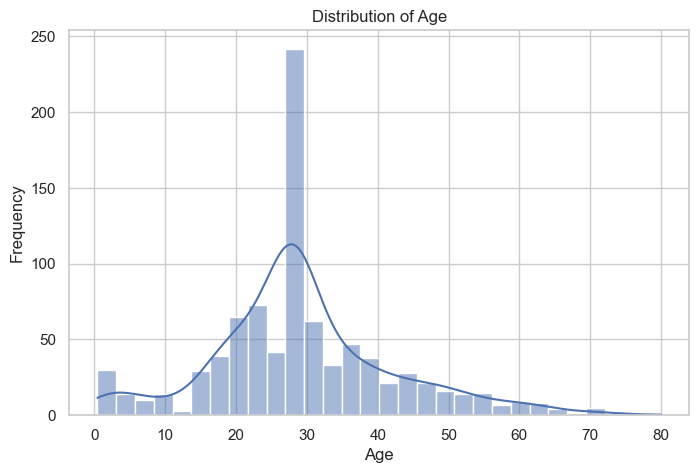

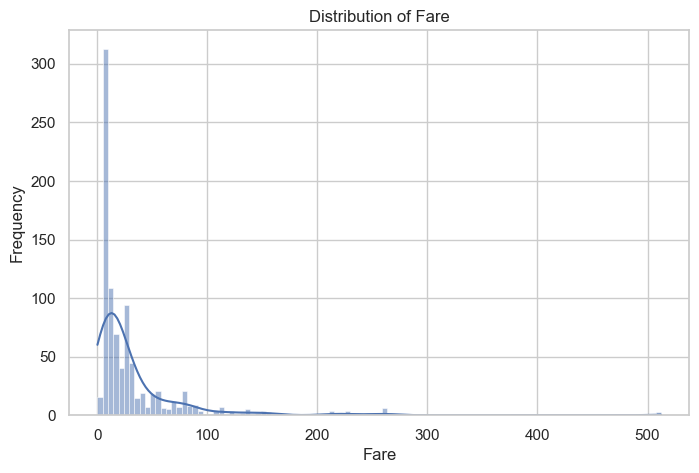

In [30]:
# 1. Data Distribution

## Histograms for numerical features
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(train[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

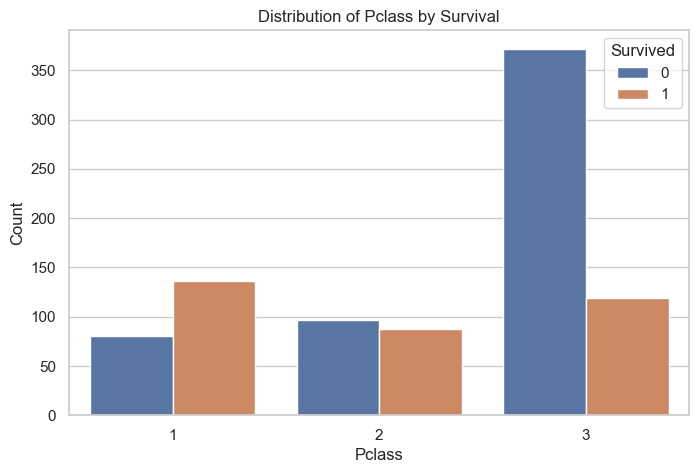

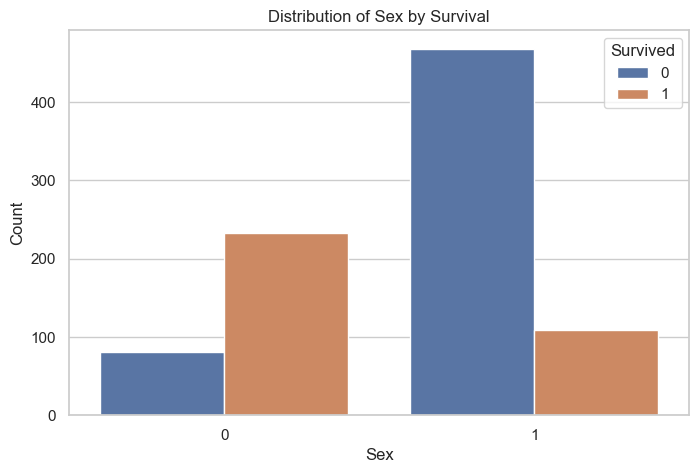

In [31]:
## Bar plots for categorical features
categorical_features = ['Pclass', 'Sex']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=train, hue='Survived')
    plt.title(f'Distribution of {feature} by Survival')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

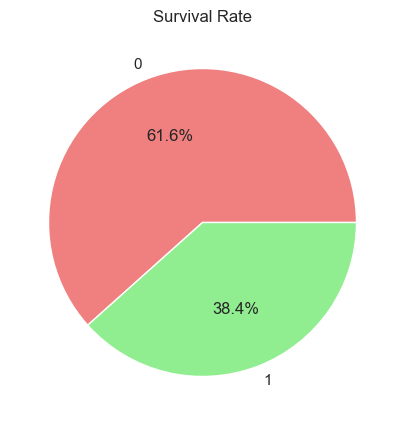

In [32]:
# 2. Survival Rate

plt.figure(figsize=(8, 5))
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Survival Rate')
plt.ylabel('')
plt.show()

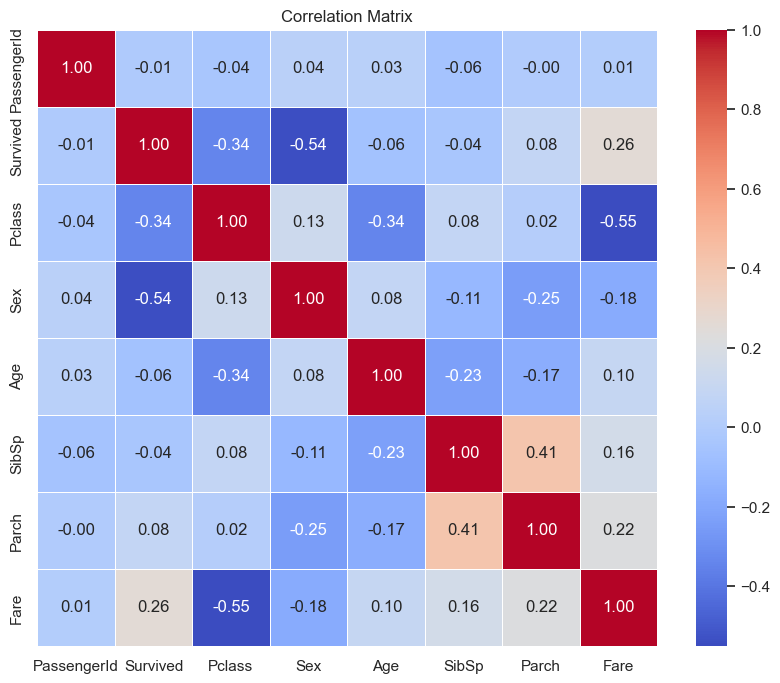

In [38]:
# 3. Correlation Matrix

# Select only numeric columns
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(train[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

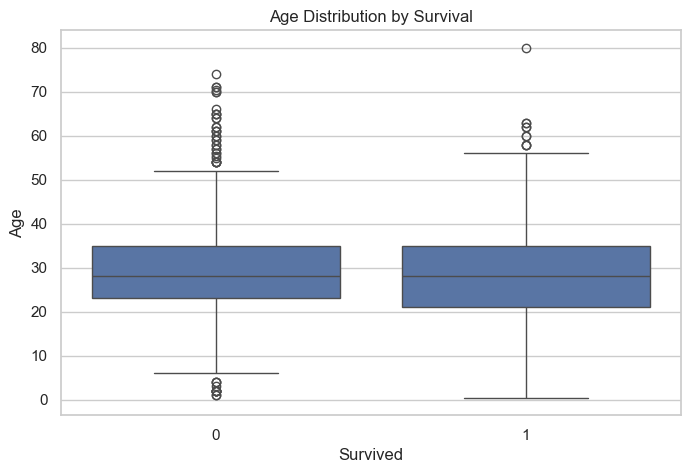

In [35]:
# 4. Age vs. Survival

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

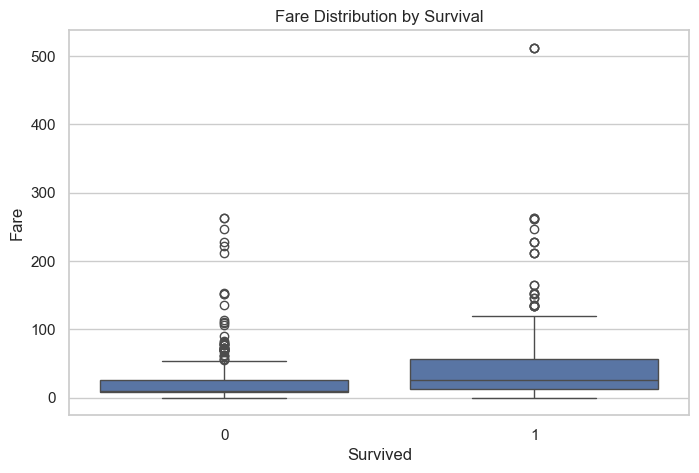

In [36]:
# 5. Fare vs. Survival

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

C:\Users\axe\AppData\Local\Temp\ipykernel_8760\4206209957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train, palette='Set2')
C:\Users\axe\AppData\Local\Temp\ipykernel_8760\4206209957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train, palette='Set2')
C:\Users\axe\AppData\Local\Temp\ipykernel_8760\4206209957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train, palette='Set2')


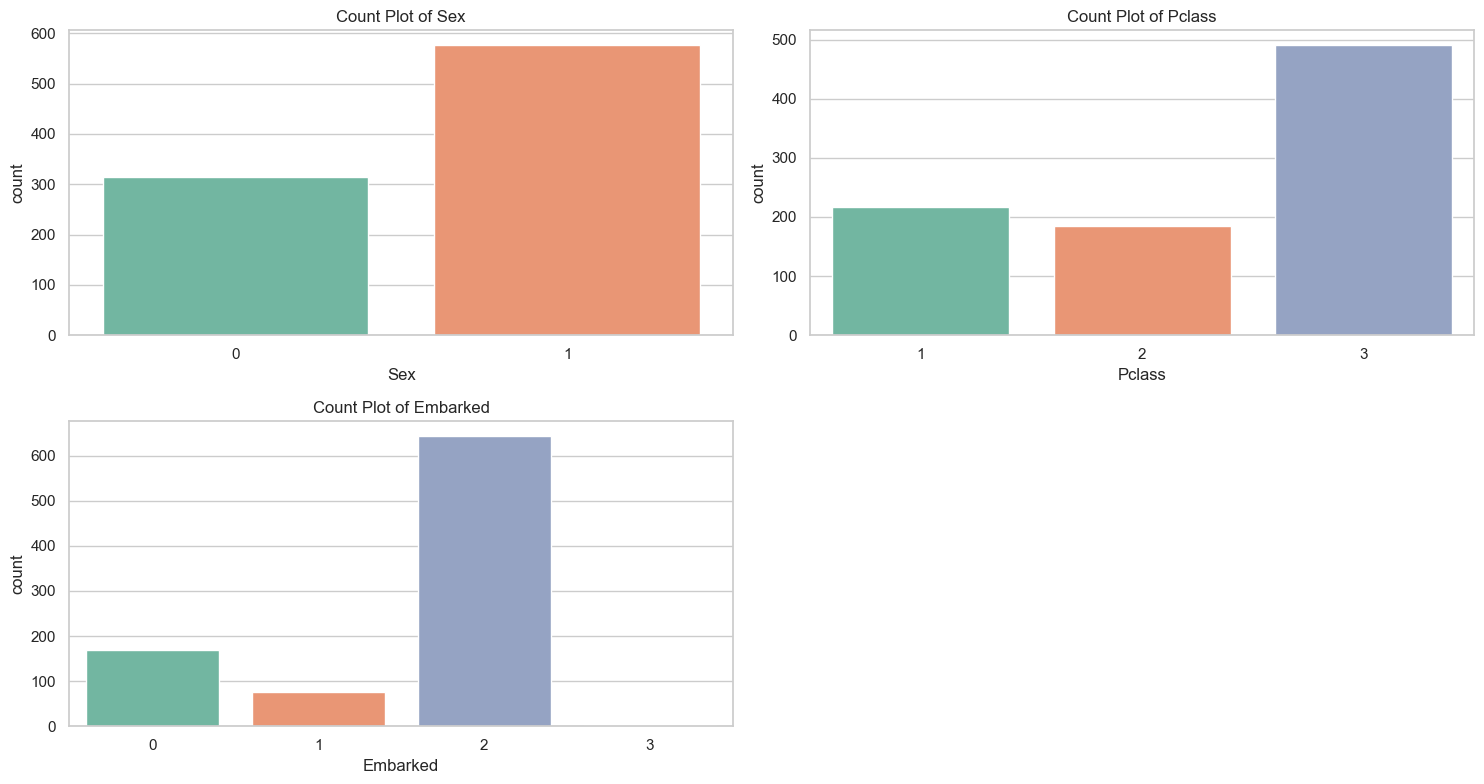

In [39]:
#Count Plot for Categorical Features
categorical_features = ['Sex', 'Pclass', 'Embarked']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=train, palette='Set2')
    plt.title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()

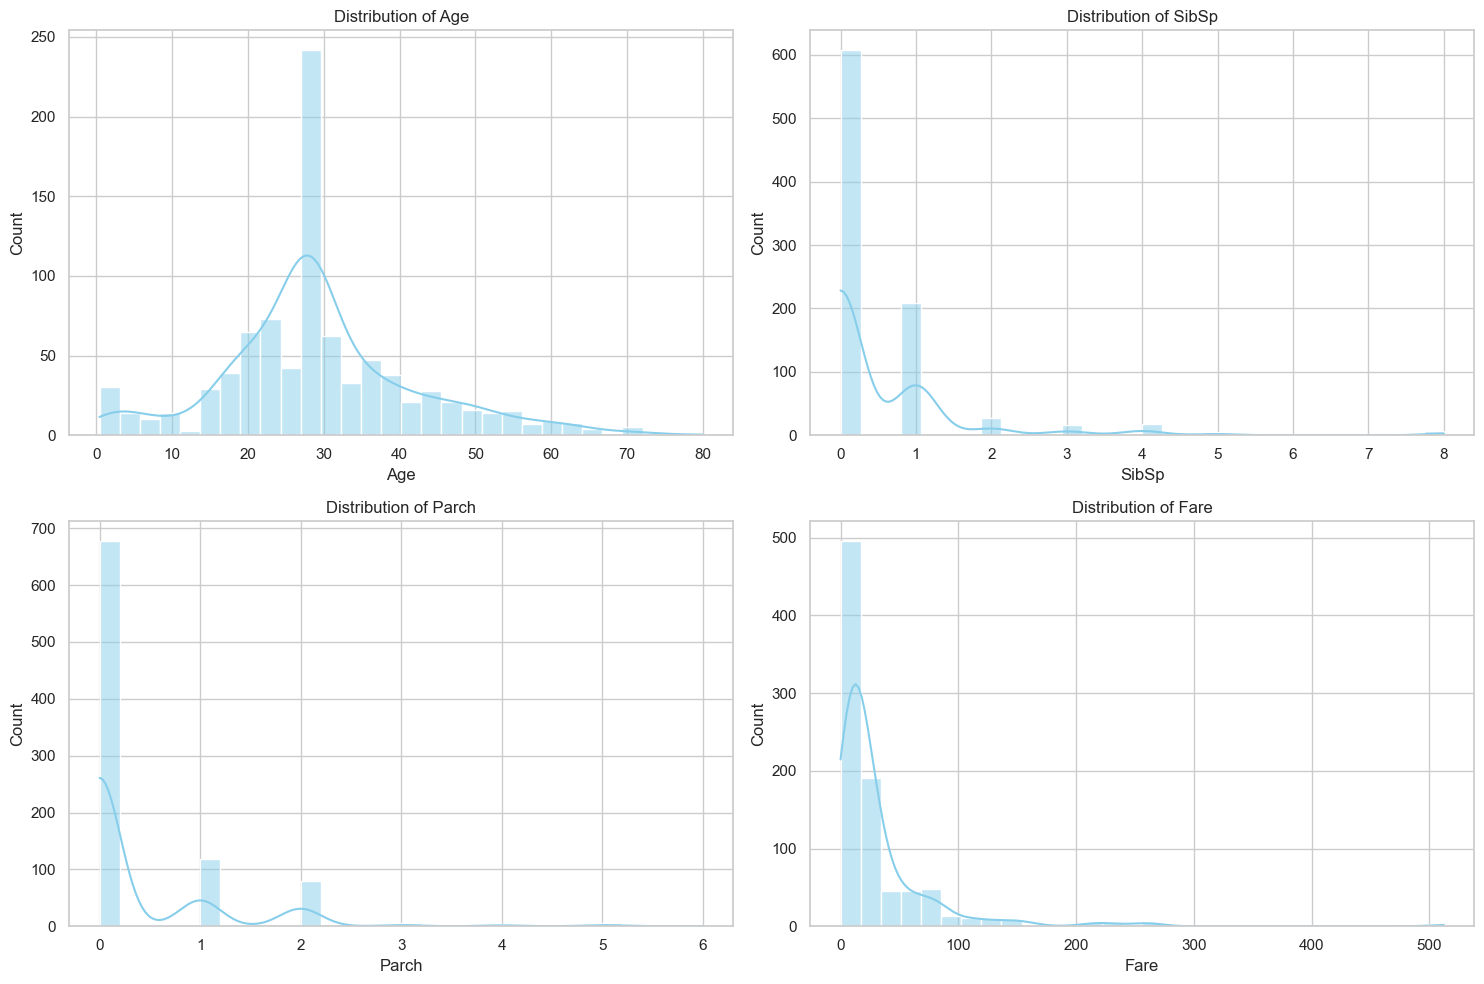

In [40]:
#Distribution of Numeric Features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

C:\Users\axe\AppData\Local\Temp\ipykernel_8760\3911776668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y=feature, data=train, palette='Set2')
C:\Users\axe\AppData\Local\Temp\ipykernel_8760\3911776668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y=feature, data=train, palette='Set2')
C:\Users\axe\AppData\Local\Temp\ipykernel_8760\3911776668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y=feature, data=train, palette='Set2')
C:\Users\axe\AppData\Local\Temp\ipykernel_8760\3911776668.

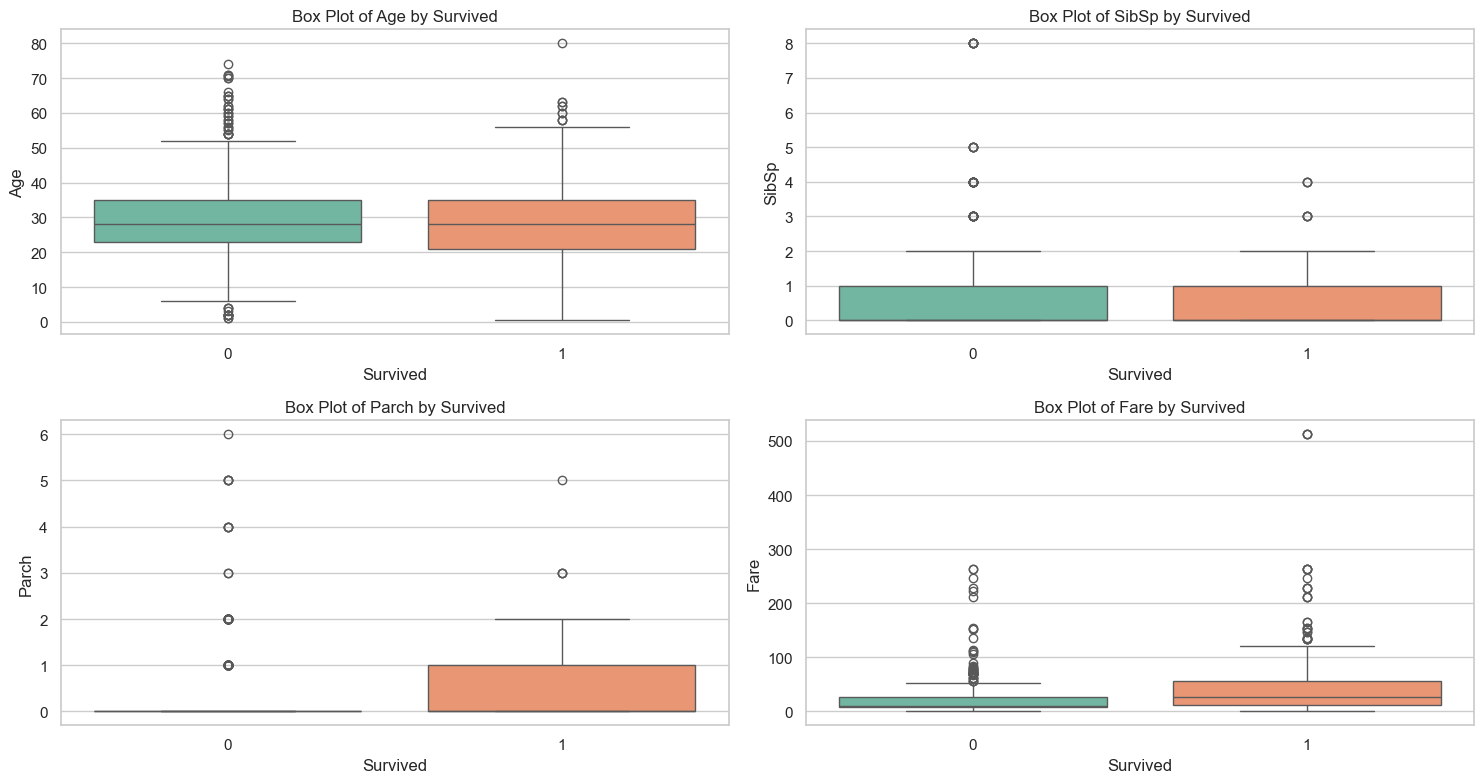

In [42]:
#Box Plots for Outlier Detection
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Survived', y=feature, data=train, palette='Set2')
    plt.title(f'Box Plot of {feature} by Survived')

plt.tight_layout()
plt.show()

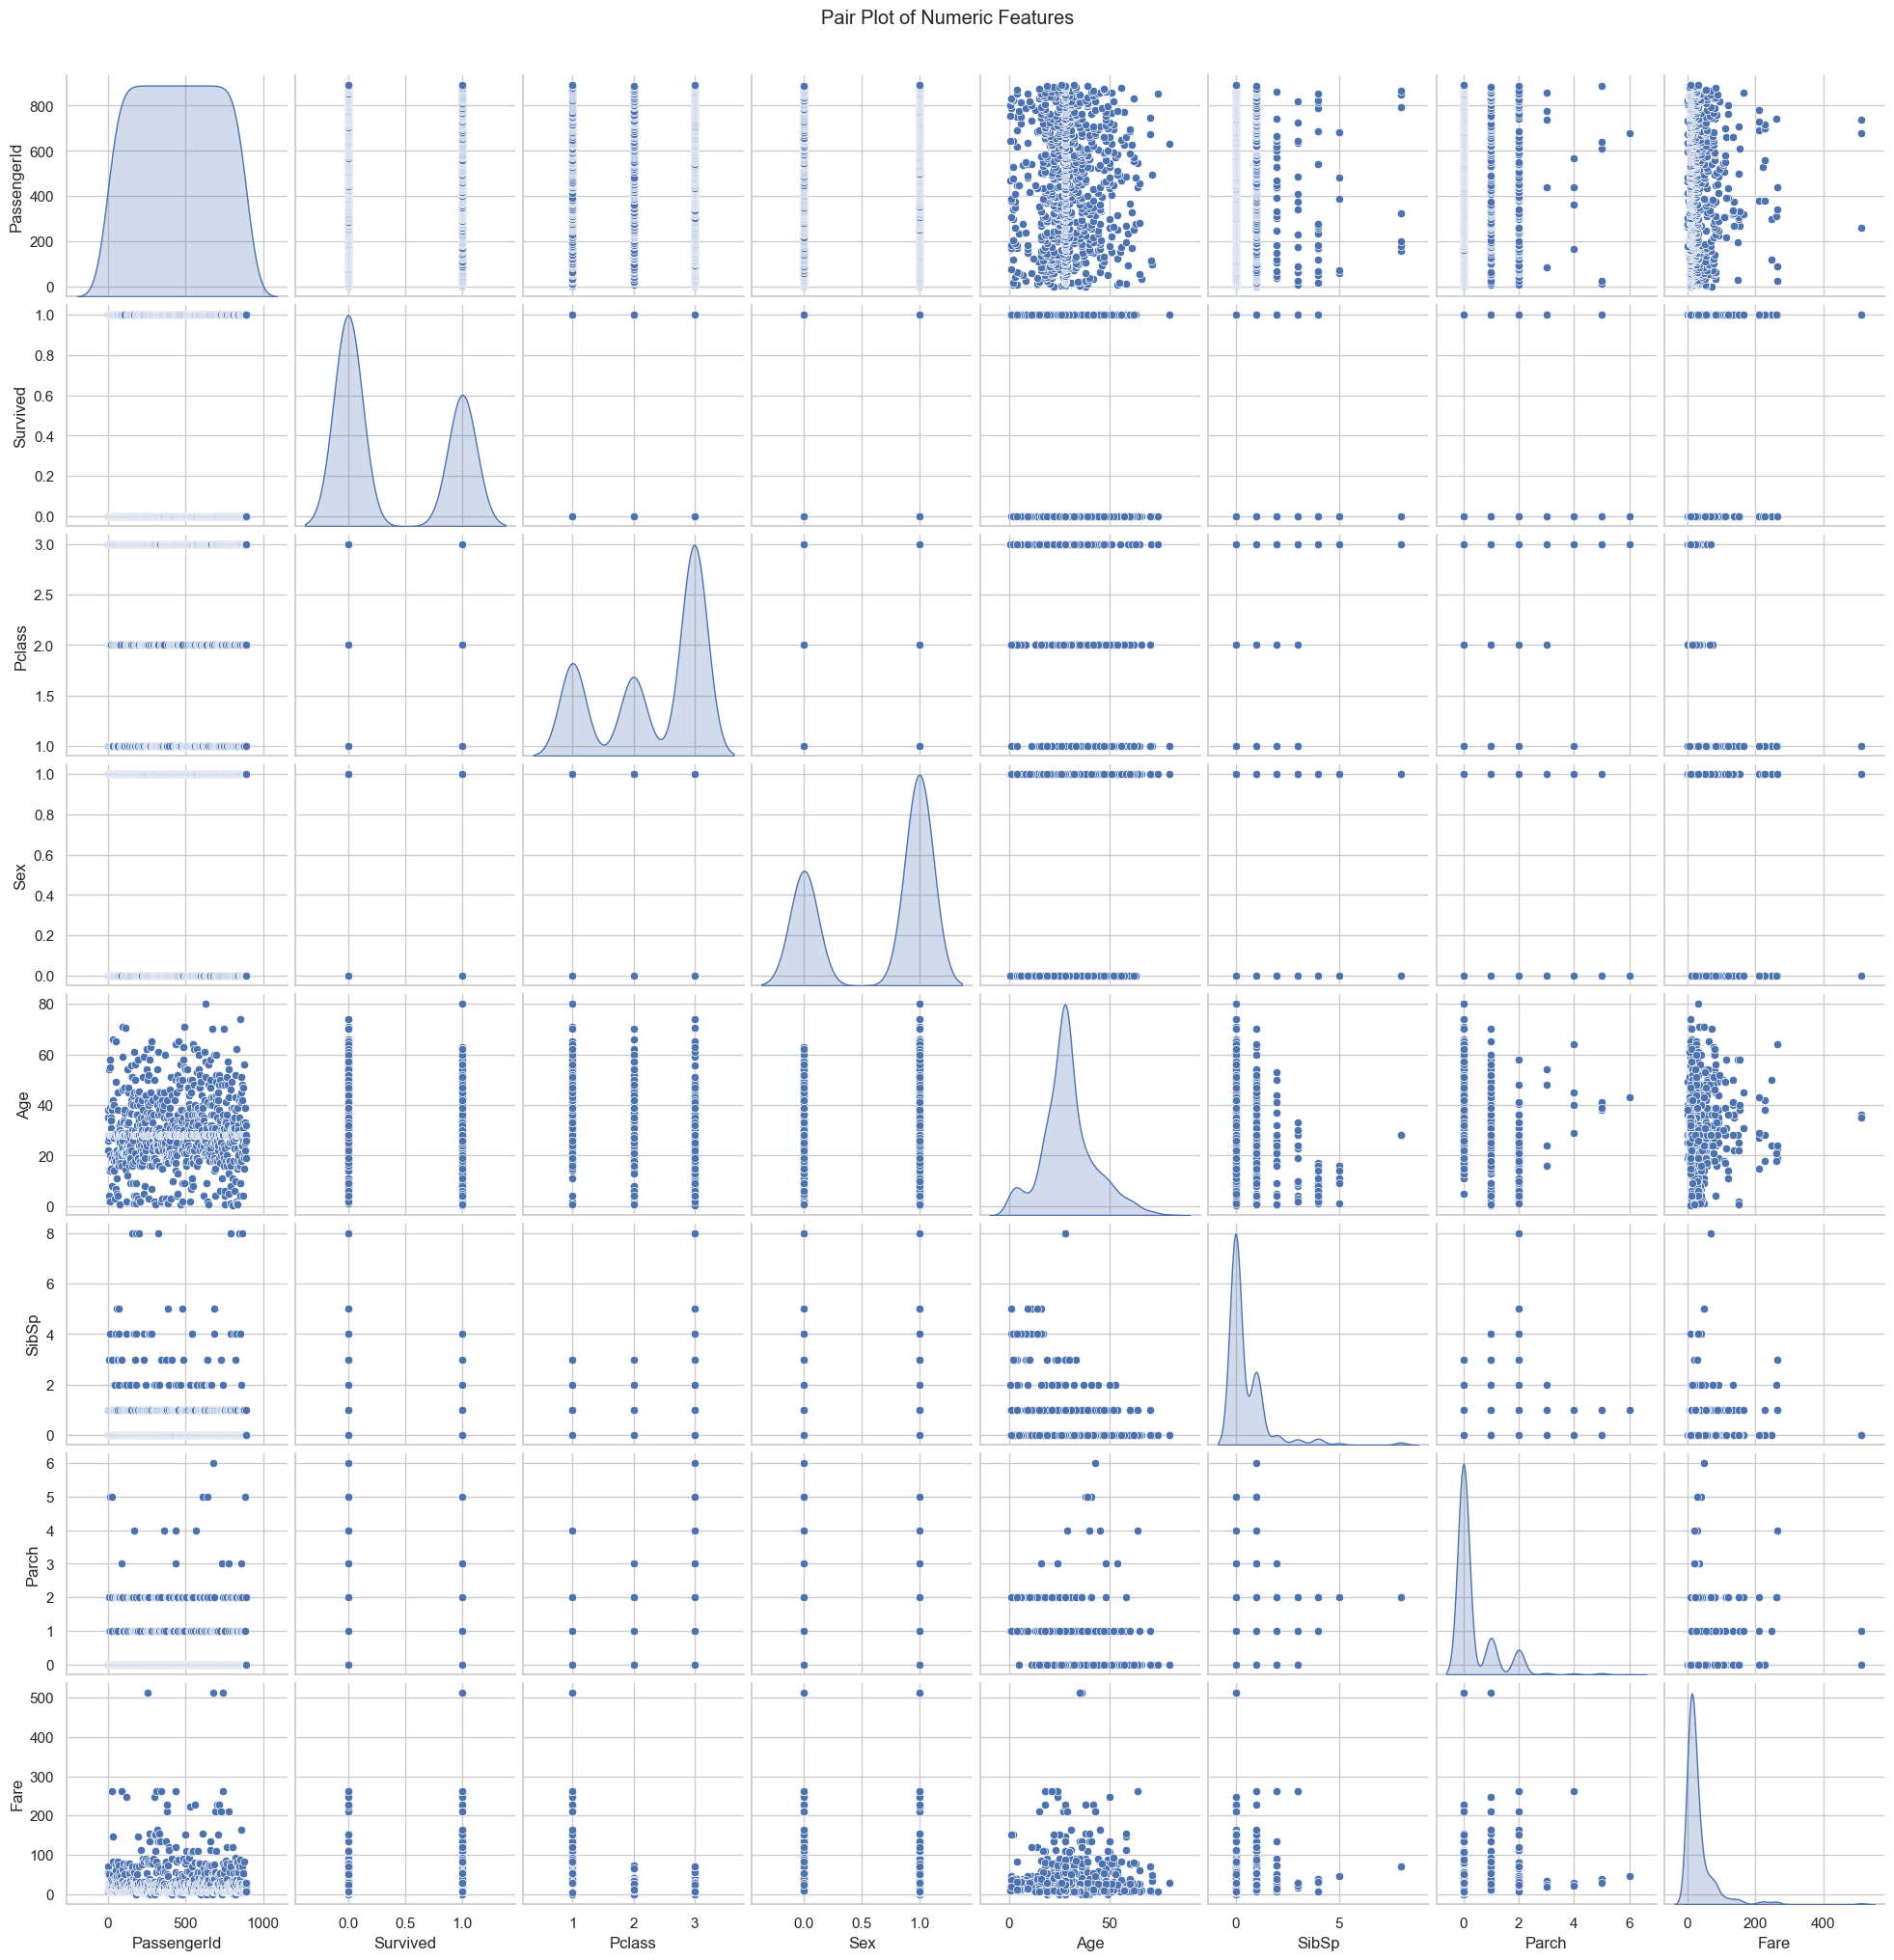

In [43]:
#Pair Plot for Relationships
sns.pairplot(train[numeric_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()